In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import pandas as pd
import re

from scipy.stats import norm, skew, shapiro
from scipy import stats
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Functions import *

warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Dataset/mr_beast_dataset.csv')
df.rename(columns={'day': 'day of week'}, inplace=True)
df.head(2)

,video_id,channelTitle,title,viewCount,likeCount,commentCount,comments,title_clean,date,day of week,duration(s),year,month,clean,senti,positive_senti,negative_senti,neutral_senti
0,KOEfDvr4DcQ,MrBeast,"Face Your Biggest Fear To Win $800,000",101868832,4025540,151759,['The new Feastables bars will take some time ...,face big fear win money,2024-02-10,Saturday,1323,2024,2,['The new Feastables bars will take some time ...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.175026,0.070807,0.719920
1,krsBRQbOPQ4,MrBeast,"$1 vs $250,000,000 Private Island!",132353095,4380220,97258,['I hope you all enjoy how much we’ve been lev...,money vs money private island,2024-01-27,Saturday,1019,2024,1,['I hope you all enjoy how much weve been leve...,"[{'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'com...",0.185993,0.031824,0.727717


In [3]:
df.shape

(774, 18)

In [4]:
df.describe()

,viewCount,likeCount,commentCount,duration(s),year,month,positive_senti,negative_senti,neutral_senti
count,7.740000e+02,7.740000e+02,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,5.575364e+07,1.711413e+06,35857.426357,1136.881137,2016.729974,6.673127,0.155849,0.036608,0.772375
std,1.056597e+08,4.005129e+06,64068.271046,6920.912619,2.891430,3.301633,0.040805,0.021927,0.048365
min,4.361200e+04,0.000000e+00,116.000000,15.000000,2012.000000,1.000000,0.000000,0.000000,0.501973
25%,8.093575e+04,2.357500e+03,384.750000,177.500000,2015.000000,4.000000,0.130252,0.022318,0.743264
50%,5.866985e+05,1.830400e+04,2018.000000,271.000000,2016.000000,7.000000,0.152879,0.031081,0.775163
75%,7.985749e+07,1.831549e+06,51304.250000,759.750000,2019.000000,9.000000,0.179201,0.044916,0.803781
max,1.111988e+09,4.586078e+07,742943.000000,86402.000000,2024.000000,12.000000,0.364068,0.197073,1.000000


In [5]:
df.isnull().sum().any()

False

# 1) Skewness for Dependent Variable

mu = 55753642.86, sigma = 105591465.11, skewness = 3.797

Null Hypothesis - Assume View count is a normal distribution

Reject Null Hypothesis
1.7625223798615398e-39


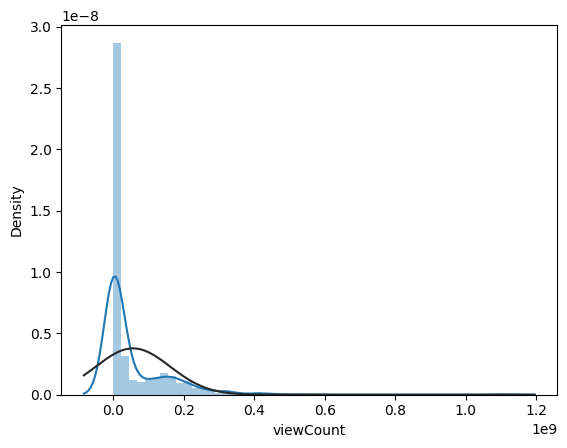

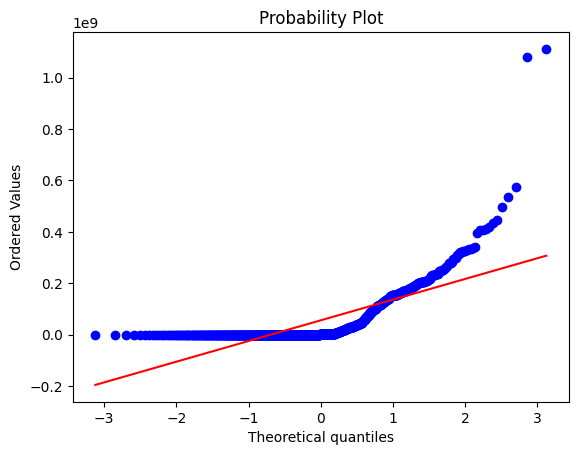

In [6]:
sns.distplot(df['viewCount'], fit = norm)
skewness = skew(df['viewCount'])
                
mu, sigma = norm.fit(df['viewCount'])
print('mu = {:.2f}, sigma = {:.2f}, skewness = {:.3f}'.format(mu, sigma, skewness))

figure = plt.figure()

qqplot = stats.probplot(df['viewCount'], plot = plt)

_, p_value = shapiro(df['viewCount'])

print()
print("Null Hypothesis - Assume View count is a normal distribution")
print()
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")
print(p_value)

## The distribution of our target variable is highly right-skewed, as indicated by a skewness score of 3.797. Ideally, a skewness score below 1 is preferred

mu = 14.52, sigma = 3.35, skewness = 0.26

Null Hypothesis - Assume View count is a normal distribution

Reject Null Hypothesis
1.1847924276301731e-26


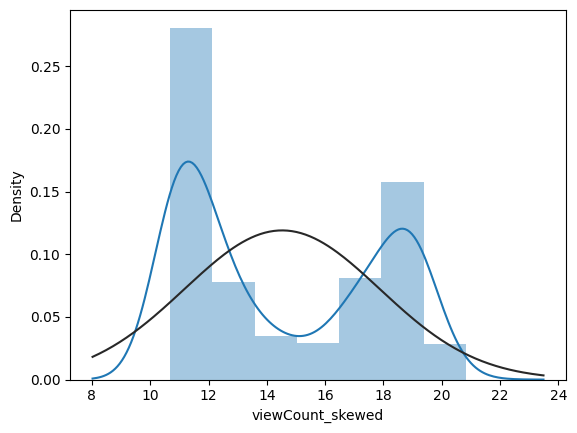

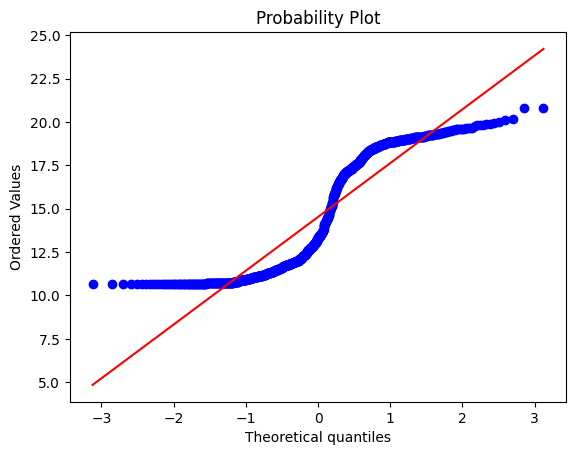

In [7]:
df['viewCount_skewed'] = np.log1p(df['viewCount'])
skewness = skew(df['viewCount_skewed'])

sns.distplot(df['viewCount_skewed'], fit = norm)
mu, sigma = norm.fit(df['viewCount_skewed'])

print("mu = {:.2f}, sigma = {:.2f}, skewness = {:.2f}".format(mu,sigma, skewness))

fig = plt.figure()

qqplot = stats.probplot(df['viewCount_skewed'], plot = plt)

_, p_value = shapiro(df['viewCount_skewed'])

print()
print("Null Hypothesis - Assume View count is a normal distribution")
print()
if p_value > 0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")
print(p_value)

## After applying the log transformation, the skewness score has been reduced to 0.26, aligning with the ideal range. However, despite this improvement, the data distribution does not fully conform to a normal distribution. Consequently, it is advisable to explore non-parametric machine learning methods, such as decision trees or random forests, which can handle non-linear relationships more effectively and are less reliant on the assumption of normality

# 2) Analyzing Video Titles through View Count and Like Count 

# Top 10 Videos based on Views

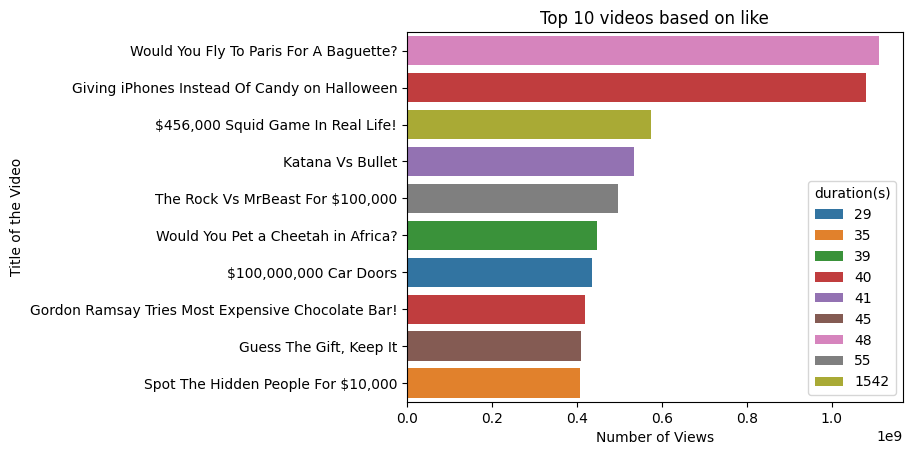

In [8]:
index_top10_view = df['viewCount'].nlargest(10).index
index_top10_df_view = df.loc[index_top10_view]

sns.barplot(x = 'viewCount', y = 'title', hue = 'duration(s)', data = index_top10_df_view, dodge=False)
plt.title('Top 10 videos based on like')
plt.xlabel('Number of Views')
plt.ylabel('Title of the Video')
plt.show()

## My hypothesis is that it is quite surprising to observe that out of the top 10 videos by views, nine of them have a duration of less than a minute!

# Lowest 10 Videos based on Views

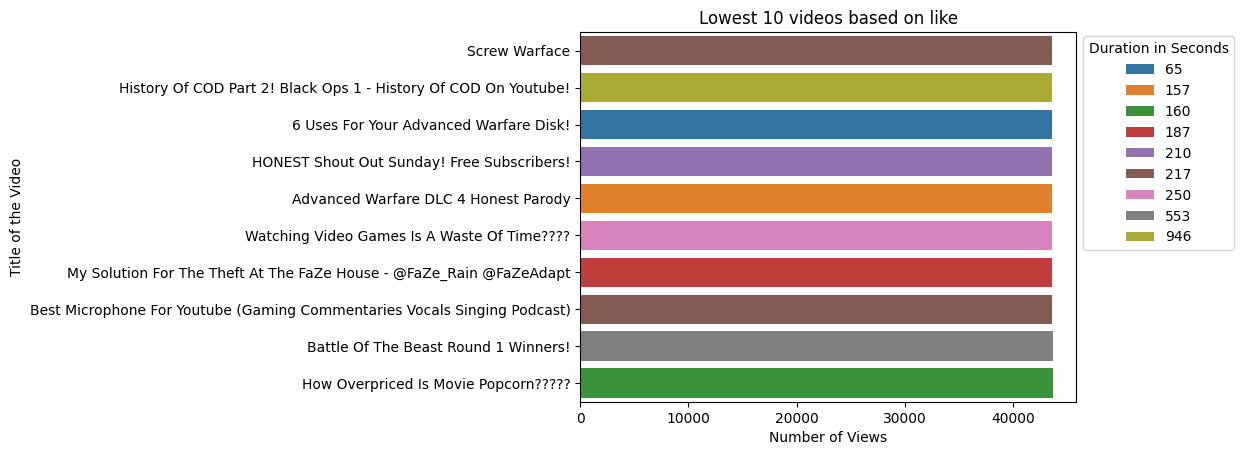

In [9]:
index_low10_view = df['viewCount'].nsmallest(10).index
index_low10_df_view = df.loc[index_low10_view]

sns.barplot(x = 'viewCount', y = 'title', hue = 'duration(s)', data = index_low10_df_view, dodge=False)
plt.title('Lowest 10 videos based on like')
plt.legend(title='Duration in Seconds', bbox_to_anchor=(1, 0.70), loc='center left')
plt.xlabel('Number of Views')
plt.ylabel('Title of the Video')
plt.show()

## Out of the 10 videos, 8 fall within the duration range of 180 to 300 seconds. Does the duration significantly impact the number of views? We will investigate this further at a later time

# Top 10 Videos based on Likes

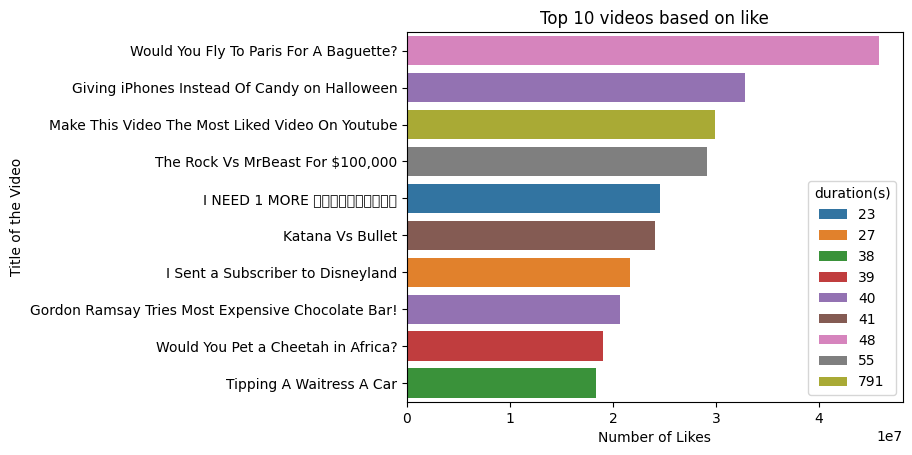

In [10]:
# Lets visuliaze the likes 

index_top10_like = df['likeCount'].nlargest(10).index
index_top10_df_like = df.loc[index_top10_like]
sns.barplot(x = 'likeCount', y = 'title', hue = 'duration(s)', data = index_top10_df_like, dodge=False)
plt.title('Top 10 videos based on like')
plt.xlabel('Number of Likes')
plt.ylabel('Title of the Video')
plt.show()

## Similarly to the views count, nine of them have a duration of less than a minute!
## However, it is unfair for any recently uploaded video which I'm looking to calculate the average views per day

# Top 10 Videos based on Views Per Day

In [11]:
from datetime import datetime
current_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['diff_date'] = (current_date - df['date']).dt.days
df['View per day'] = df['viewCount']/df['diff_date']
df['Like per day'] = df['likeCount']/df['diff_date']

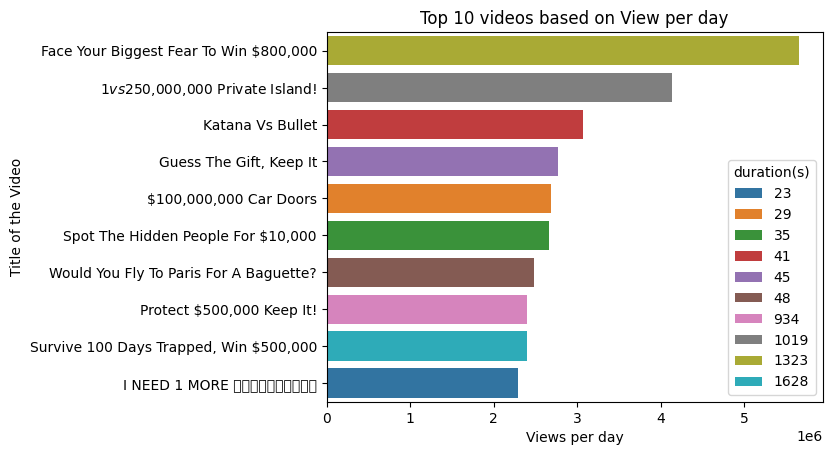

In [12]:
index_top10_view_per_day = df['View per day'].nlargest(10).index
index_top10_df_view_per_day = df.loc[index_top10_view_per_day]

sns.barplot(x = 'View per day', y = 'title', hue = 'duration(s)', data = index_top10_df_view_per_day, dodge=False)
plt.title('Top 10 videos based on View per day')
plt.xlabel('Views per day')
plt.ylabel('Title of the Video')
plt.show()

# Top 10 Videos based on Likes Per Day

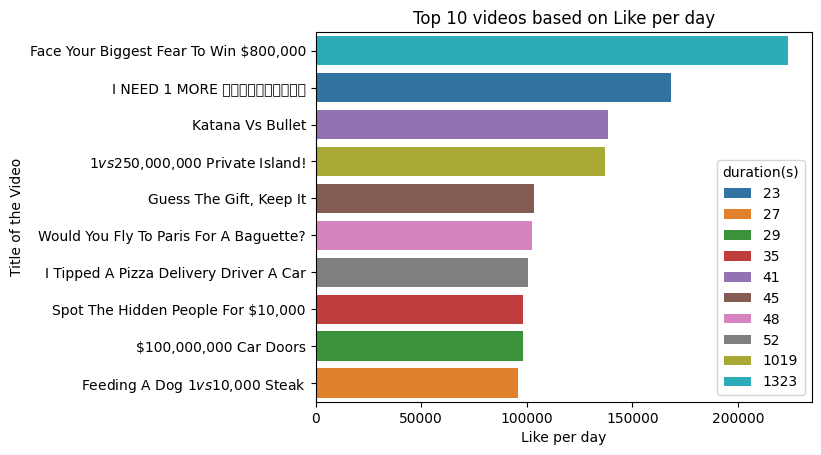

In [13]:
index_top10_like_per_day = df['Like per day'].nlargest(10).index
index_top10_df_like_per_day = df.loc[index_top10_like_per_day]

sns.barplot(x = 'Like per day', y = 'title', hue = 'duration(s)', data = index_top10_df_like_per_day, dodge=False)
plt.title('Top 10 videos based on Like per day')
plt.xlabel('Like per day')
plt.ylabel('Title of the Video')
plt.show()

### Hypothesis: 
### 'Face Your Biggest Fear to Win $800,000' garners significantly higher daily views and likes compared to other videos.
### Analyzing the Top 10 Video Titles reveals a prevalence of money-Related themes, such as Gift-Giving, Tipping, and Flying to Paris

# 3) Analyzing Video Durations over Time

## Utilizing a boxplot to discern the distribution of video durations

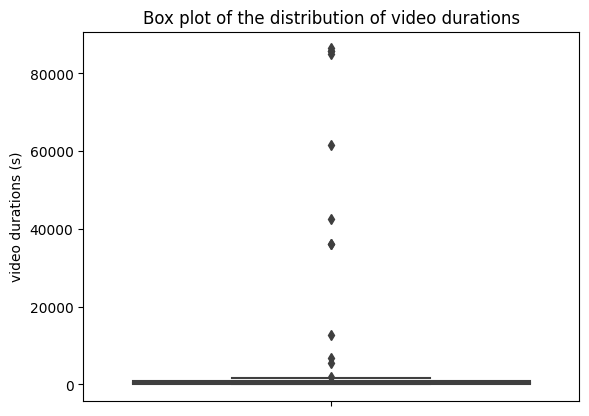

The median video duration:  271.0
The mean video duration:  1136.8811369509044


In [14]:
# Lets visualize the avergae duration Mr beast made by boxplot

sns.boxplot(y = 'duration(s)', data = df)

plt.title('Box plot of the distribution of video durations')
plt.ylabel('video durations (s)')
plt.show()

print('The median video duration: ', df['duration(s)'].median())
print('The mean video duration: ',df['duration(s)'].mean())

# Finding trend of view count and like count over the years

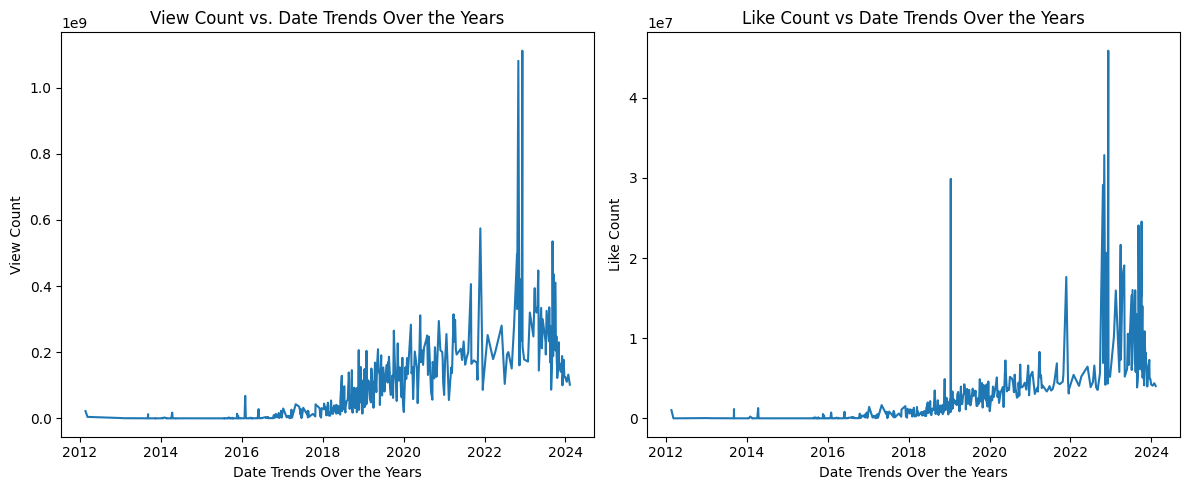

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first line plot
sns.lineplot(x = 'date', y = 'viewCount' , data = df, ax=axes[0])
axes[0].set_title('View Count vs. Date Trends Over the Years')
axes[0].set_xlabel('Date Trends Over the Years')
axes[0].set_ylabel('View Count')

# Plot the second line plot
sns.lineplot(x='date', y='likeCount', data=df, ax=axes[1])
axes[1].set_title('Like Count vs Date Trends Over the Years')
axes[1].set_xlabel('Date Trends Over the Years')
axes[1].set_ylabel('Like Count')

plt.tight_layout()
plt.show()

## There is a spark during 2019. Did more people start watching his videos in 2019 when COVID-19 hit and everyone had to stay indoors

# Finding trend of Duration (s) over the years

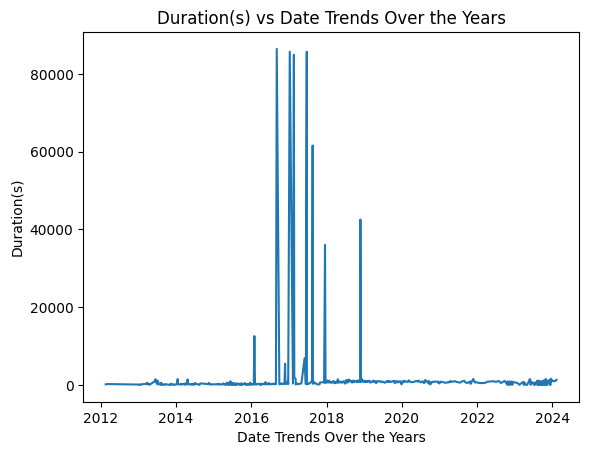

In [16]:
sns.lineplot(x='date', y='duration(s)', data=df)
plt.title('Duration(s) vs Date Trends Over the Years')
plt.xlabel('Date Trends Over the Years')
plt.ylabel('Duration(s)')
plt.show()

## A longer-duration videos (more than 11 hours) was observed around the year 2017. 

# Analyze the day on which MrBeast uploads the most overall

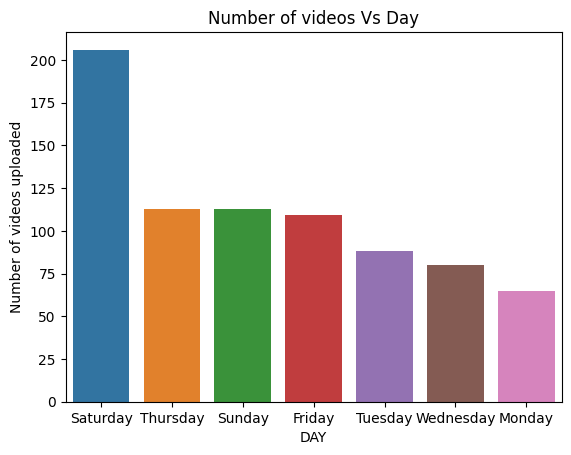

In [17]:
sns.countplot(x='day of week', data=df, order=df['day of week'].value_counts().index)

plt.title('Number of videos Vs Day')
plt.xlabel('DAY')
plt.ylabel('Number of videos uploaded')
plt.show()

# Analyze the day on which MrBeast uploads the most every year

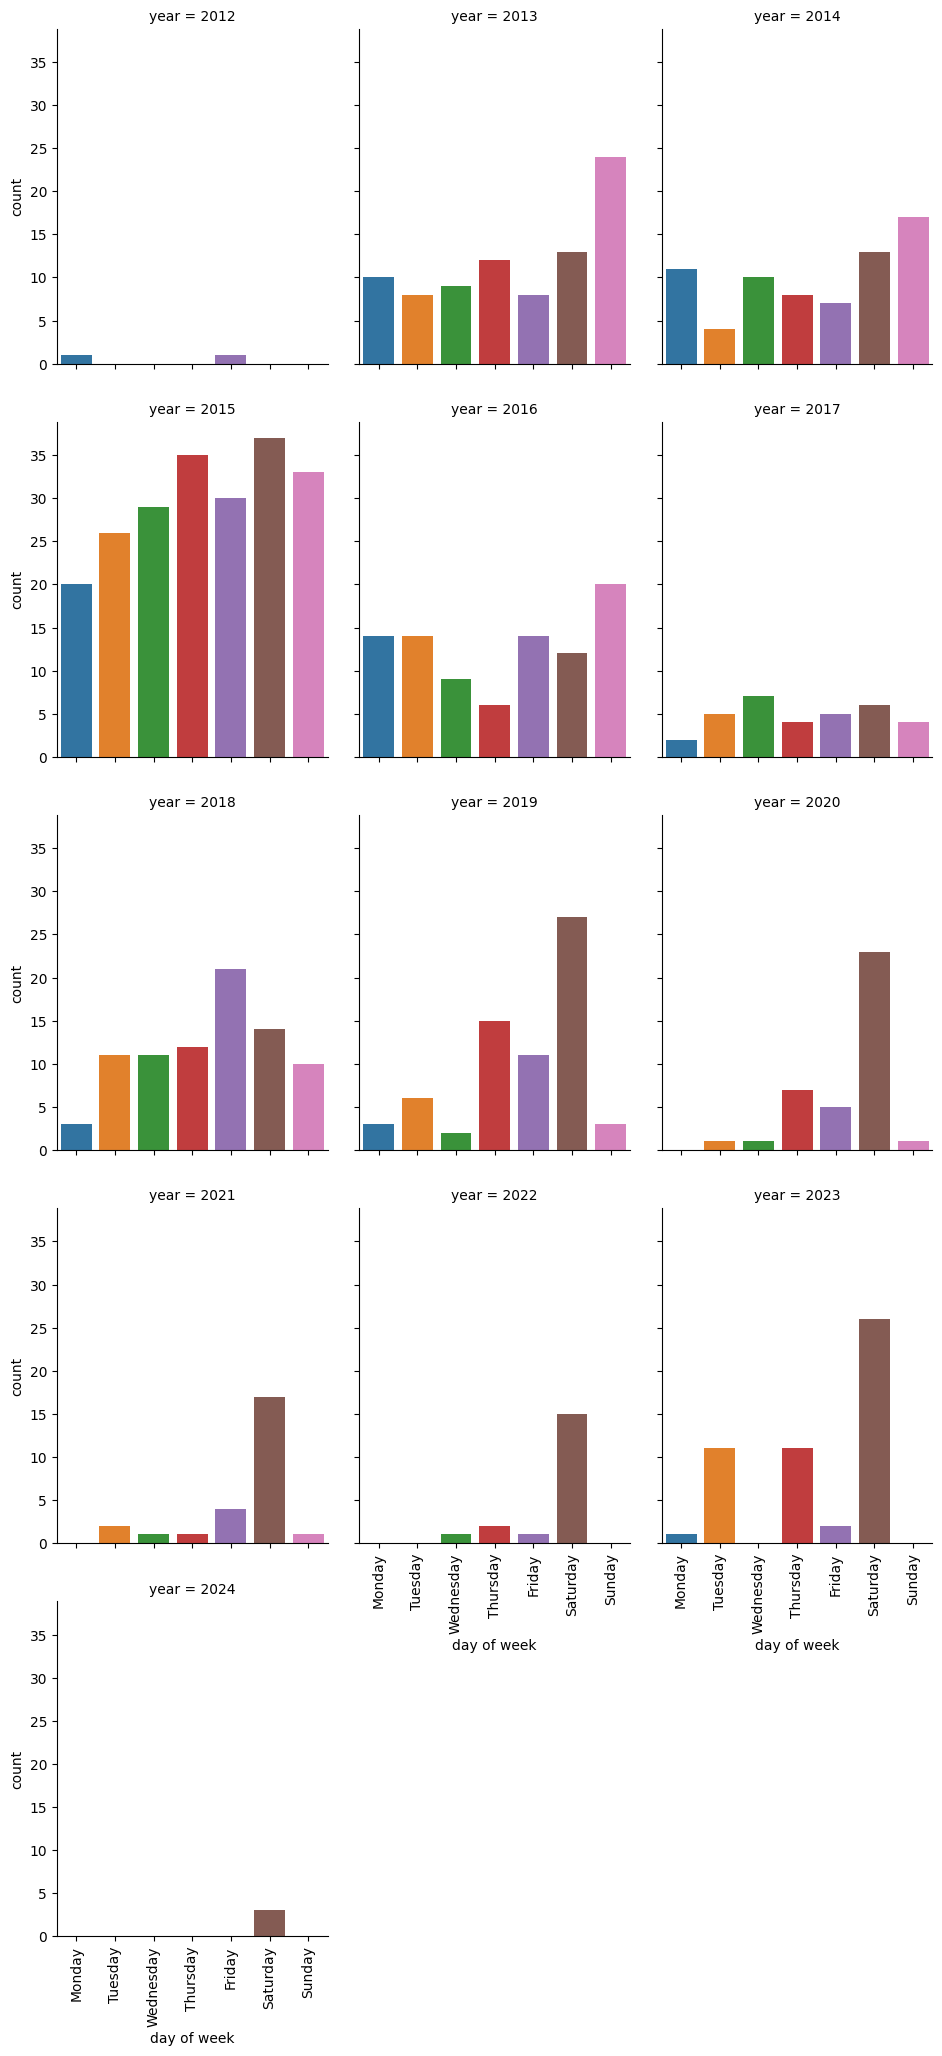

In [18]:
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.catplot(x='day of week', col='year', kind='count', data=df, height=4, aspect=0.8, col_wrap=3, order = order_day)
g.set_xticklabels(rotation=90)

### Hypothesis:
### The view and like counts experience a significant surge after 2019, potentially influenced by the COVID-19 pandemic, leading to increased stay-at-home viewership.
### Videos with longer durations (over 11 hours) were notably prevalent around the year 2017.
### Starting from 2019, Mr. Beast predominantly uploads videos on Saturdays.

# 4) Examining the relationships between view count, like count, and duration

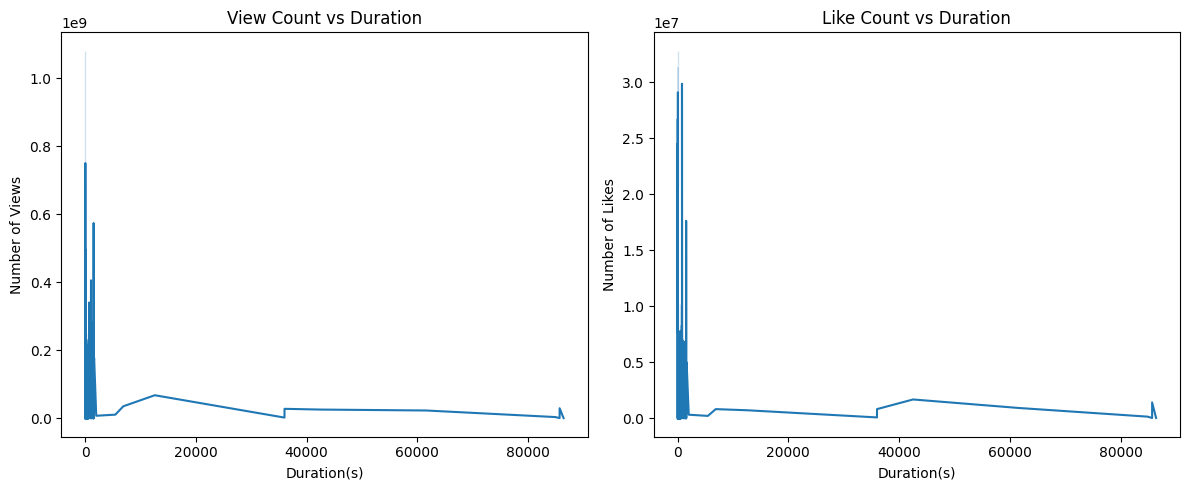

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first line plot
sns.lineplot(x='duration(s)', y='viewCount', data=df, ax=axes[0])
axes[0].set_title('View Count vs Duration')
axes[0].set_xlabel('Duration(s)')
axes[0].set_ylabel('Number of Views')

# Plot the second line plot
sns.lineplot(x='duration(s)', y='likeCount', data=df, ax=axes[1])
axes[1].set_title('Like Count vs Duration')
axes[1].set_xlabel('Duration(s)')
axes[1].set_ylabel('Number of Likes')

plt.tight_layout()
plt.show()

## While durations under 5000 seconds are more prevalent, their distribution appears tightly clustered. Perhaps we can enhance the trend visualization by excluding durations of 5000 seconds or more.

## Examining the relationships between view count, like count, and duration less than 5000s

In [20]:
new_df = df[df['duration(s)'].apply(lambda x: x < 5000)]

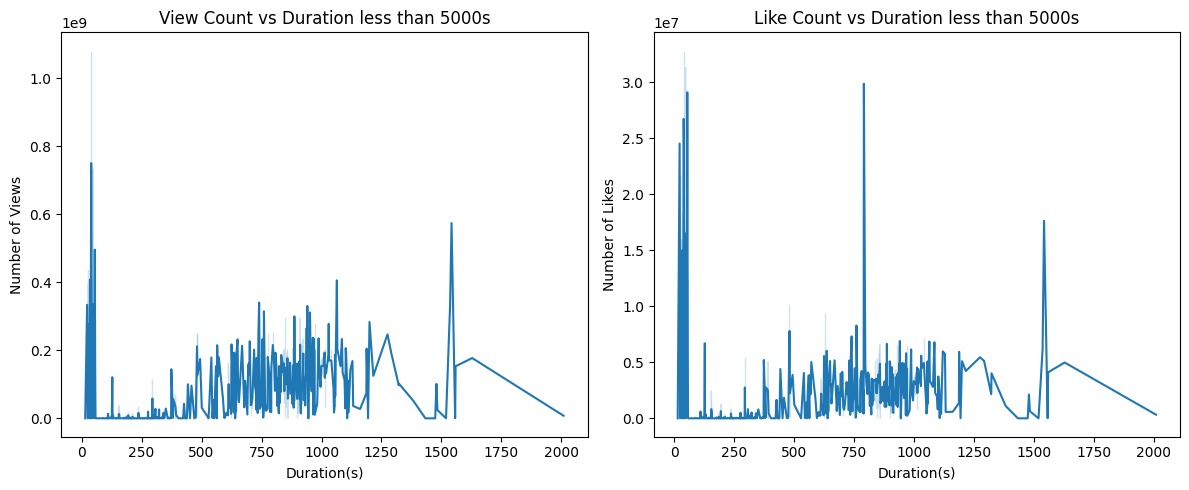

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first line plot
sns.lineplot(x='duration(s)', y='viewCount', data=new_df, ax=axes[0])
axes[0].set_title('View Count vs Duration less than 5000s')
axes[0].set_xlabel('Duration(s)')
axes[0].set_ylabel('Number of Views')
                   
# Plot the second line plot
sns.lineplot(x='duration(s)', y='likeCount', data=new_df, ax=axes[1])
axes[1].set_title('Like Count vs Duration less than 5000s')
axes[1].set_xlabel('Duration(s)')
axes[1].set_ylabel('Number of Likes')

plt.tight_layout()
plt.show()

## Perharps we can group the durations into different categories to visualize which categories has the most number of views

# Grouping durations into different categories for a more detailed visualization.

In [22]:
df['dur_label'] = df['duration(s)'].apply(mapping)

Text(0, 0.5, 'Durations')

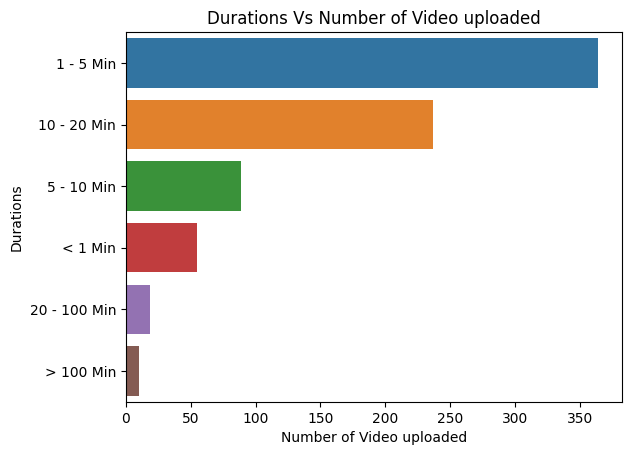

In [23]:
sns.countplot(y = 'dur_label', data = df, order = df['dur_label'].value_counts().sort_values(ascending=False).index)
plt.title('Durations Vs Number of Video uploaded')
plt.xlabel('Number of Video uploaded')
plt.ylabel('Durations')

## Mr. Beast has the largest number of videos with durations ranging from 1 to 5 minutes

Text(0, 0.5, 'Durations')

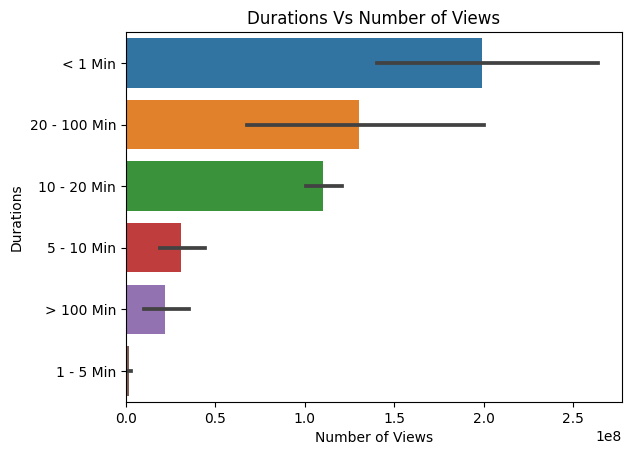

In [24]:
count_df = df.groupby('dur_label')['viewCount'].mean().sort_values(ascending=False).index
sns.barplot(x='viewCount', y='dur_label', data=df, order=count_df)

plt.title('Durations Vs Number of Views')
plt.xlabel('Number of Views')
plt.ylabel('Durations')

## MrBeast has the most video duration range, falling between 1 to 5 minutes, yet exhibits the lowest average number of views compared to other categories
## Videos with durations shorter than a minute are more likely to be viewed by the audience
## Videos exceeding 100 minutes are less likely to be viewed by the audience

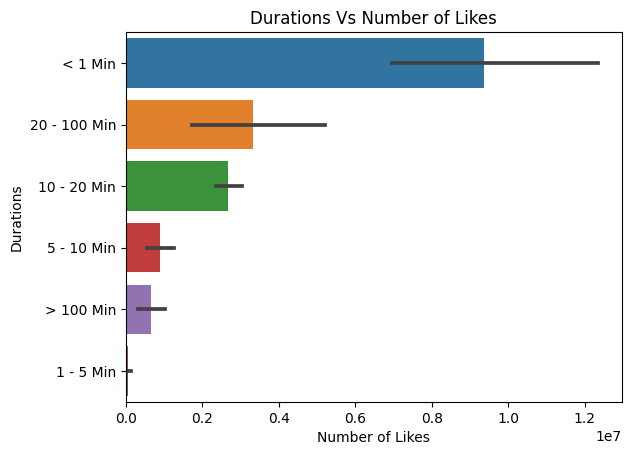

In [25]:
like_df = df.groupby('dur_label')['likeCount'].mean().sort_values(ascending=False).index

sns.barplot(x='likeCount', y='dur_label', data=df, order=like_df)
plt.title('Durations Vs Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Durations')
plt.show()

# Visualize the relationships between Comments, Likes vs View 

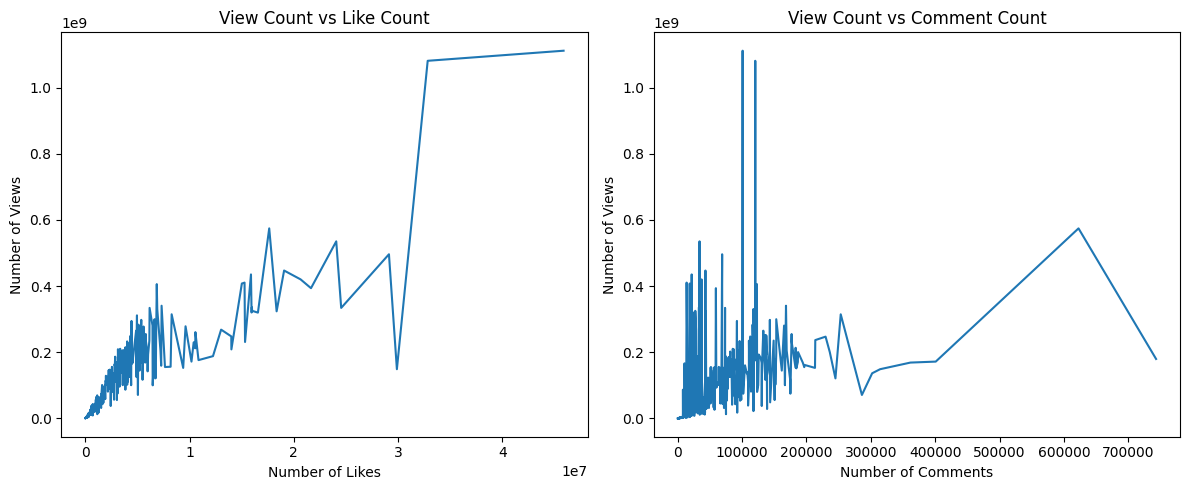

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first line plot
sns.lineplot(x='likeCount', y='viewCount', data=new_df, ax=axes[0])
axes[0].set_title('View Count vs Like Count')
axes[0].set_xlabel('Number of Likes')
axes[0].set_ylabel('Number of Views')
                   
# Plot the second line plot
sns.lineplot(x='commentCount', y='viewCount', data=new_df, ax=axes[1])
axes[1].set_title('View Count vs Comment Count')
axes[1].set_xlabel('Number of Comments')
axes[1].set_ylabel('Number of Views')

plt.tight_layout()
plt.show()

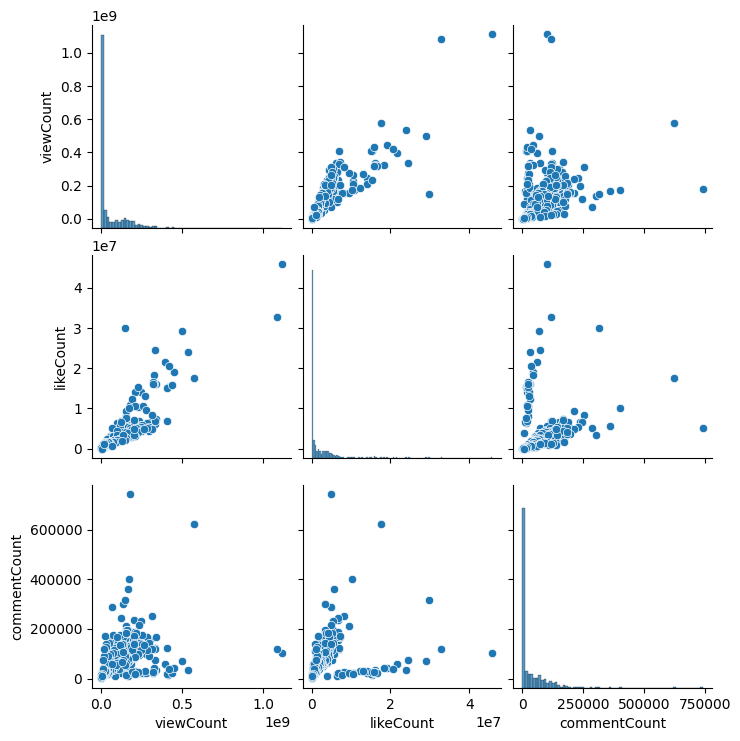

In [27]:
sns.pairplot(df[['viewCount', 'likeCount', 'commentCount']])
plt.show()

<AxesSubplot:>

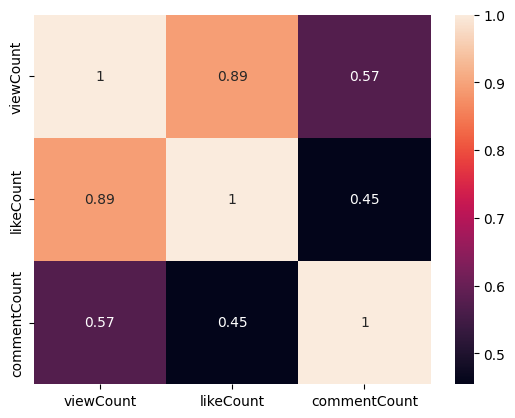

In [28]:
sns.heatmap(df[['viewCount', 'likeCount', 'commentCount']].corr(), annot=True)

In [29]:
df

,video_id,channelTitle,title,viewCount,likeCount,commentCount,comments,title_clean,date,day of week,duration(s),year,month,clean,senti,positive_senti,negative_senti,neutral_senti,viewCount_skewed,diff_date,View per day,Like per day,dur_label
0,KOEfDvr4DcQ,MrBeast,"Face Your Biggest Fear To Win $800,000",101868832,4025540,151759,['The new Feastables bars will take some time ...,face big fear win money,2024-02-10,Saturday,1323,2024,2,['The new Feastables bars will take some time ...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.175026,0.070807,0.719920,18.439197,18,5.659380e+06,223641.111111,20 - 100 Min
1,krsBRQbOPQ4,MrBeast,"$1 vs $250,000,000 Private Island!",132353095,4380220,97258,['I hope you all enjoy how much we’ve been lev...,money vs money private island,2024-01-27,Saturday,1019,2024,1,['I hope you all enjoy how much weve been leve...,"[{'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'com...",0.185993,0.031824,0.727717,18.700984,32,4.136034e+06,136881.875000,10 - 20 Min
2,7ESeQBeikKs,MrBeast,"Protect $500,000 Keep It!",110379739,4075544,75623,['The new Feastables branding and chocolate fo...,protect money keep,2024-01-13,Saturday,934,2024,1,['The new Feastables branding and chocolate fo...,"[{'neg': 0.12, 'neu': 0.728, 'pos': 0.152, 'co...",0.187616,0.028090,0.706690,18.519437,46,2.399560e+06,88598.782609,10 - 20 Min
3,K_CbgLpvH9E,MrBeast,I Spent 7 Days In Solitary Confinement,125032838,4230264,80321,"['watch until the end for good luck', 'No cred...",spend number day solitary confinement,2023-12-30,Saturday,1216,2023,12,"['watch until the end for good luck', 'No cred...","[{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'com...",0.165002,0.033459,0.733439,18.644087,60,2.083881e+06,70504.400000,20 - 100 Min
4,lOKASgtr6kU,MrBeast,I Rescued 100 Abandoned Dogs!,124742129,4924317,94035,['Every family who adopted a dog was fully vet...,rescue number abandon dog,2023-12-23,Saturday,903,2023,12,['Every family who adopted a dog was fully vet...,"[{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'com...",0.213707,0.030198,0.704984,18.641759,67,1.861823e+06,73497.268657,10 - 20 Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),905042,35467,3259,"['Don’t ask', 'Mr beast🎉', '🤔😭💪🏻', '❤', 'Comen...",epic minecraft skin ever psy,2013-01-13,Sunday,31,2013,1,"['Dont ask', '😂😂😂', 'Seed?', '5!', 'Videasoooo...","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.202321,0.015670,0.727539,13.715738,4063,2.227522e+02,8.729264,< 1 Min
770,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,1041789,40874,3540,"['I just got home from baseball practice lol',...",bird minecraft,2013-01-12,Saturday,126,2013,1,"['I just got home from baseball practice lol',...","[{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'com...",0.187270,0.016162,0.746296,13.856451,4064,2.563457e+02,10.057579,1 - 5 Min
771,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,1230046,48134,4193,['I bought a new mic but it turned out to be w...,boxy item mod minecraft epic,2013-01-12,Saturday,90,2013,1,['I bought a new mic but it turned out to be w...,"[{'neg': 0.182, 'neu': 0.656, 'pos': 0.162, 'c...",0.186593,0.011852,0.736901,14.022563,4064,3.026688e+02,11.843996,1 - 5 Min
772,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,4434195,0,8412,['I remember filming this with my horrible lap...,harry potter mod minecraft epic must see mod,2012-03-09,Friday,239,2012,3,['I remember filming this with my horrible lap...,"[{'neg': 0.18, 'neu': 0.515, 'pos': 0.304, 'co...",0.187285,0.019433,0.740647,15.304857,4373,1.013994e+03,0.000000,1 - 5 Min


# 5) Frequent words used in video title

## Top 10 tokens based on frequencies

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

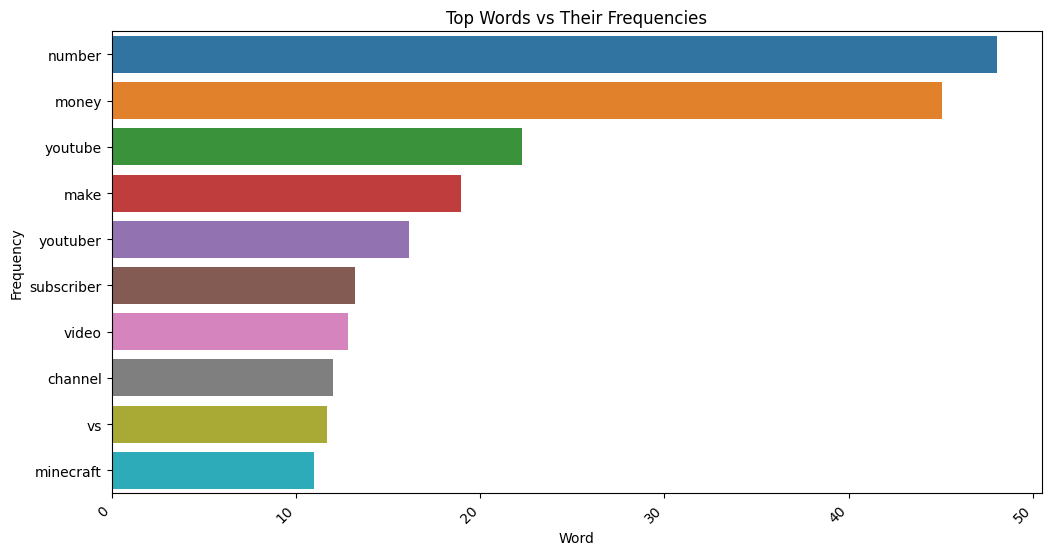

In [31]:
vectorizer = TfidfVectorizer(stop_words='english') 

# Fit and transform the 'joined_tokens' column
X_text = vectorizer.fit_transform(df['title_clean'])

# Get feature names (words) and their corresponding indices
feature_names = vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each word across all documents
word_scores = X_text.sum(axis=0).A1

# Create a DataFrame to display word frequencies
word_frequencies = pd.DataFrame({'Word': feature_names, 'Frequency': word_scores})

# Sort the DataFrame by frequency in descending order
word_frequencies_sorted = word_frequencies.sort_values(by='Frequency', ascending=False)

# Print the top words and their frequencies
plt.figure(figsize=(12, 6))
sns.barplot(y='Word', x='Frequency', data=word_frequencies_sorted.head(10))
plt.title('Top Words vs Their Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### However, it's important to note that the most frequent words may not necessarily have a significant impact on view count. To measure the words' influence on view count, each token is assigned the view count of its corresponding video title.
### For instance, consider the title "An apple is red" with 180 views. In this case, the assigned view counts for each word would be: 'an' - 180, 'apple' - 180, 'is' - 180, 'red' - 180. Following this, the data is grouped using 'groupby' to calculate the total view count for each word.

In [32]:
df['token'] = df['title_clean'].apply(only_words)

In [33]:
df1 = df[['token', 'viewCount']]
df_explode = df1.explode('token')
df_explode.head(10)

,token,viewCount
0,face,101868832
0,big,101868832
0,fear,101868832
0,win,101868832
0,money,101868832
1,money,132353095
1,vs,132353095
1,money,132353095
1,private,132353095
1,island,132353095


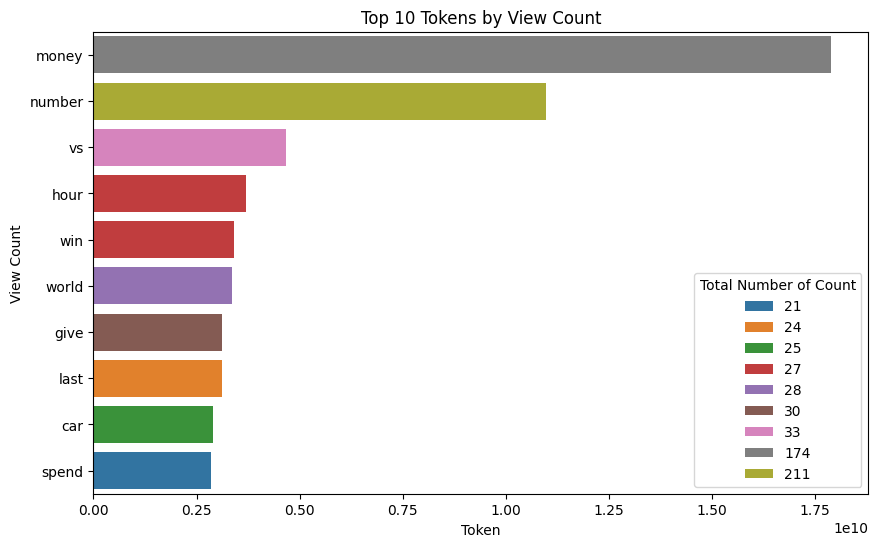

In [34]:
grouped_data = df_explode.groupby('token')['viewCount'].sum().reset_index()
grouped_data1= df_explode.groupby('token')['viewCount'].count().reset_index()

df2 = pd.DataFrame({'Token':grouped_data['token'], 'Sum of View count':grouped_data['viewCount'], 'Total Number of Count':grouped_data1['viewCount']})
top_10_data = df2.sort_values(by='Sum of View count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot( x='Sum of View count', y='Token', hue = 'Total Number of Count', data=top_10_data, dodge = False)
plt.xlabel('Token')
plt.ylabel('View Count')
plt.title('Top 10 Tokens by View Count')
plt.show()

In [35]:
df.head()

,video_id,channelTitle,title,viewCount,likeCount,commentCount,comments,title_clean,date,day of week,duration(s),year,month,clean,senti,positive_senti,negative_senti,neutral_senti,viewCount_skewed,diff_date,View per day,Like per day,dur_label,token
0,KOEfDvr4DcQ,MrBeast,"Face Your Biggest Fear To Win $800,000",101868832,4025540,151759,['The new Feastables bars will take some time ...,face big fear win money,2024-02-10,Saturday,1323,2024,2,['The new Feastables bars will take some time ...,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.175026,0.070807,0.719920,18.439197,18,5.659380e+06,223641.111111,20 - 100 Min,"[face, big, fear, win, money]"
1,krsBRQbOPQ4,MrBeast,"$1 vs $250,000,000 Private Island!",132353095,4380220,97258,['I hope you all enjoy how much we’ve been lev...,money vs money private island,2024-01-27,Saturday,1019,2024,1,['I hope you all enjoy how much weve been leve...,"[{'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'com...",0.185993,0.031824,0.727717,18.700984,32,4.136034e+06,136881.875000,10 - 20 Min,"[money, vs, money, private, island]"
2,7ESeQBeikKs,MrBeast,"Protect $500,000 Keep It!",110379739,4075544,75623,['The new Feastables branding and chocolate fo...,protect money keep,2024-01-13,Saturday,934,2024,1,['The new Feastables branding and chocolate fo...,"[{'neg': 0.12, 'neu': 0.728, 'pos': 0.152, 'co...",0.187616,0.028090,0.706690,18.519437,46,2.399560e+06,88598.782609,10 - 20 Min,"[protect, money, keep]"
3,K_CbgLpvH9E,MrBeast,I Spent 7 Days In Solitary Confinement,125032838,4230264,80321,"['watch until the end for good luck', 'No cred...",spend number day solitary confinement,2023-12-30,Saturday,1216,2023,12,"['watch until the end for good luck', 'No cred...","[{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'com...",0.165002,0.033459,0.733439,18.644087,60,2.083881e+06,70504.400000,20 - 100 Min,"[spend, number, day, solitary, confinement]"
4,lOKASgtr6kU,MrBeast,I Rescued 100 Abandoned Dogs!,124742129,4924317,94035,['Every family who adopted a dog was fully vet...,rescue number abandon dog,2023-12-23,Saturday,903,2023,12,['Every family who adopted a dog was fully vet...,"[{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'com...",0.213707,0.030198,0.704984,18.641759,67,1.861823e+06,73497.268657,10 - 20 Min,"[rescue, number, abandon, dog]"


In [36]:
df.to_csv('Dataset/data_powerbi.csv',index=False)

### Hypothesis: 
### The top 10 tokens represent words associated with events involving substantial amounts of money

# 6) Getting ready for machine learning

# Skewness for Independent Variable

In [37]:
skewed_num = df[['likeCount', 'commentCount', 'Like per day', 'duration(s)']].apply(lambda x: skew(x)).sort_values(ascending = False)
skew_num_df = pd.DataFrame({'Skew': skewed_num})
skew_num_df.head(10)

,Skew
duration(s),10.908945
Like per day,5.210912
likeCount,4.965921
commentCount,4.109361


### Apply box cox on numberical variable that has skew of more than 0.75

In [38]:
from scipy.special import boxcox1p

high_skew = skew_num_df[abs(skew_num_df) > 0.75]
skewed_features = high_skew.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

In [39]:
skewed_num = df[['likeCount', 'commentCount', 'Like per day', 'duration(s)']].apply(lambda x: skew(x)).sort_values(ascending = False)
skew_num_df = pd.DataFrame({'Skew': skewed_num})
skew_num_df.head(10)

,Skew
duration(s),2.723060
Like per day,1.248432
likeCount,0.529358
commentCount,0.423981


In [40]:
df[['likeCount', 'commentCount', 'Like per day', 'duration(s)']].head()

,likeCount,commentCount,Like per day,duration(s)
0,58.591126,33.243389,35.633471,12.930439
1,59.422937,30.666791,32.630488,12.178447
2,58.712081,29.284061,30.148235,11.934084
3,59.078507,29.610547,28.908103,12.684285
4,60.593921,30.478547,29.130636,11.840247


## Merge tf-idf weight for text and data frame

In [41]:
df_final = pd.concat([pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out()), df], axis=1)
df_final.drop(df_final.columns[:5], axis=1, inplace=True)

In [42]:
df_final.head(1)

,abandon,accept,account,active,actually,ad,adapt,addiction,adopt,adult,advanced,advertise,advertisement,africa,age,agent,ago,airplane,aka,alive,almost4k,amazing,amazon,analytic,animation,announcement,antarctica,antibeast,anymore,apart,apartment,apocalypse,app,area,arm,art,ask,assassin,asylum,athlete,attack,attempt,auto,aw,away,baby,background,backyard,bad,baguette,ball,balloon,band,bank,banner,bar,base,basketball,bathroom,battle,battleship,bay,beach,beard,beast,beat,bed,bee,begin,beginner,believe,bermuda,biblical,big,bigre,bike,bil,billboard,billionaire,bird,birthday,black,bleach,blind,blink,block,blocker,blow,blower,bo2,bo3,boat,boost,booth,bore,bored,bottle,bounty,bowl,box,boxy,boy,boyz,bracket,brb,break,bridge,bro,bronze,brother,build,builder,buildoff,bullet,bunker,burger,bury,bus,business,button,buy,buzz,camping,candy,cannon,captainsparkle,capture,car,card,cardboard,care,career,carry,castle,catch,cathedral,cause,center,cereal,challenge,change,channel,chaos,character,charity,cheap,cheat,cheetah,chocolate,chore,chris,christmas,chrome,circle,city,clan,clean,click,clickbait,coaster,cod,coffee,cold,college,color,com,combine,come,comment,commentary,commercial,community,complex,computer,confinement,connor,consider,console,content,contest,cookie,cop,copy,corona,cost,count,country,crash,crazy,cream,create,creation,creator,credit,creeper,crew,cringe,crohn,crohns,cruiser,cup,cut,dad,dangerous,daryl,dat,date,day,dead,deadly,deadsocial,deaf,dealership,dear,death,degree,delete,deliver,delivery,depth,derpe,derping,desert,destroy,destroyer,diamond,die,dinosaur,dirtiest,dis,disease,disk,dislike,dislikes,disneyland,dissapoint,diy,dlc,dodgeball,dog,donate,donation,doomsday,door,double,download,dozen,dramaalert,dread,dream,drink,drive,driver,drone,drop,drpineapplez,dry,dryer,duct,dude,dumb,dumpster,duplicate,duty,e3,early,earn,eart,earth,eastereggs,eat,edge,edition,education,element,elgato,emerald,end,ender,english,enjoy,entire,entrepreneur,ep,epic,epicsauce,episode,equipment,escape,everyday,everytime,evolution,exam,exility,exist,expensive,experiment,explain,explode,explosion,extinct,extreme,face,facebook,fact,faction,factory,fail,fake,fall,family,famous,fan,fanboy,favorite,faze,fazeadapt,fazerain,fbi,fear,feed,ferris,fidget,fight,film,finally,firework,fish,fit,flame,flappy,flat,fleet,flipartz,flips,flood,fly,fnaf,food,forest,forgive,fort,fortnite,free,freind,friend,ftw,fun,funny,furthest,future,g2,gain,gamble,game,gameplay,games,gaming,gamma,gangnam,gate,gear,gfuelenergy,ghost,giant,gift,giftcard,girl,giveaway,glass,glitch,glow,goal,god,gold,golden,good,goodbye,google,gordon,grade,great,green,grenade,grief,grill,grind,grocery,grow,guess,gun,gunpowder,guy,hack,hacker,hair,half,halloween,halo,hand,happen,hard,harry,hate,haunt,hear,hearthstone,height,hellstrike,hellstrikes,help,heracross,herracross,hi,hide,high,highlight,hipster,history,hit,home,homeless,honest,hope,horrible,horribly,horse,hot,hotel,hour,house,huge,human,hunt,hunter,hydraulic,hype,ian,ice,idea,idk,illulsion,important,impossible,impression,include,increase,independent,influencer,insane,inspiration,instagram,instead,interview,intro,intros,invisible,involve,iphone,island,italy,item,itune,jacksepticeye,jctg,jeep,jet,job,join,joke,jordan,juggernugget,karnagerc,karp,katana,kem,key,keyboard,kick,kid,kill,knife,knive,know,kyr,l0114r,labeouf,lamborghini,laptop,large,laser,lava,law,layer,leaf,league,leave,legal,legendarie,legendary,legit,lego,legos,let,level,lick,lie,life,light,lighting,lights,like,link,listen,live,ll,logan,lol,long,loot,lose,lot,lottery,low,lvl,machinima,magecraft,magic,magnet,mail,make,makeover,mamabeast,man,mansion,map,marathon,marauder,markipli,markiplier,master,match,matter,max,maximum,maze,mc,mcgregor,medium,meet,megaphone,member,members,meme,mercury,message,metal,michael,micro,microphone,microwave,middle,mil,mile,milestone,military,million,millionaire,millionarie,minecraft,mini,minimum,minute,mislead,missile,mobile,mod,modern,molten,mom,monetize,money,monopoly,mon

In [43]:
df_text_inv = df_final.iloc[:, :1054]
df_text_inv['Token_sentence'] = df_text_inv.apply(lambda row: ' '.join(row.index[row != 0]), axis=1)
df_text_inv['sentence'] = df_final['title']
df_text_inv.head()

,abandon,accept,account,active,actually,ad,adapt,addiction,adopt,adult,advanced,advertise,advertisement,africa,age,agent,ago,airplane,aka,alive,almost4k,amazing,amazon,analytic,animation,announcement,antarctica,antibeast,anymore,apart,apartment,apocalypse,app,area,arm,art,ask,assassin,asylum,athlete,attack,attempt,auto,aw,away,baby,background,backyard,bad,baguette,ball,balloon,band,bank,banner,bar,base,basketball,bathroom,battle,battleship,bay,beach,beard,beast,beat,bed,bee,begin,beginner,believe,bermuda,biblical,big,bigre,bike,bil,billboard,billionaire,bird,birthday,black,bleach,blind,blink,block,blocker,blow,blower,bo2,bo3,boat,boost,booth,bore,bored,bottle,bounty,bowl,box,boxy,boy,boyz,bracket,brb,break,bridge,bro,bronze,brother,build,builder,buildoff,bullet,bunker,burger,bury,bus,business,button,buy,buzz,camping,candy,cannon,captainsparkle,capture,car,card,cardboard,care,career,carry,castle,catch,cathedral,cause,center,cereal,challenge,change,channel,chaos,character,charity,cheap,cheat,cheetah,chocolate,chore,chris,christmas,chrome,circle,city,clan,clean,click,clickbait,coaster,cod,coffee,cold,college,color,com,combine,come,comment,commentary,commercial,community,complex,computer,confinement,connor,consider,console,content,contest,cookie,cop,copy,corona,cost,count,country,crash,crazy,cream,create,creation,creator,credit,creeper,crew,cringe,crohn,crohns,cruiser,cup,cut,dad,dangerous,daryl,dat,date,day,dead,deadly,deadsocial,deaf,dealership,dear,death,degree,delete,deliver,delivery,depth,derpe,derping,desert,destroy,destroyer,diamond,die,dinosaur,dirtiest,dis,disease,disk,dislike,dislikes,disneyland,dissapoint,diy,dlc,dodgeball,dog,donate,donation,doomsday,door,double,download,dozen,dramaalert,dread,dream,drink,drive,driver,drone,drop,drpineapplez,dry,dryer,duct,dude,dumb,dumpster,duplicate,duty,e3,early,earn,eart,earth,eastereggs,eat,edge,edition,education,element,elgato,emerald,end,ender,english,enjoy,entire,entrepreneur,ep,epic,epicsauce,episode,equipment,escape,everyday,everytime,evolution,exam,exility,exist,expensive,experiment,explain,explode,explosion,extinct,extreme,face,facebook,fact,faction,factory,fail,fake,fall,family,famous,fan,fanboy,favorite,faze,fazeadapt,fazerain,fbi,fear,feed,ferris,fidget,fight,film,finally,firework,fish,fit,flame,flappy,flat,fleet,flipartz,flips,flood,fly,fnaf,food,forest,forgive,fort,fortnite,free,freind,friend,ftw,fun,funny,furthest,future,g2,gain,gamble,game,gameplay,games,gaming,gamma,gangnam,gate,gear,gfuelenergy,ghost,giant,gift,giftcard,girl,giveaway,glass,glitch,glow,goal,god,gold,golden,good,goodbye,google,gordon,grade,great,green,grenade,grief,grill,grind,grocery,grow,guess,gun,gunpowder,guy,hack,hacker,hair,half,halloween,halo,hand,happen,hard,harry,hate,haunt,hear,hearthstone,height,hellstrike,hellstrikes,help,heracross,herracross,hi,hide,high,highlight,hipster,history,hit,home,homeless,honest,hope,horrible,horribly,horse,hot,hotel,hour,house,huge,human,hunt,hunter,hydraulic,hype,ian,ice,idea,idk,illulsion,important,impossible,impression,include,increase,independent,influencer,insane,inspiration,instagram,instead,interview,intro,intros,invisible,involve,iphone,island,italy,item,itune,jacksepticeye,jctg,jeep,jet,job,join,joke,jordan,juggernugget,karnagerc,karp,katana,kem,key,keyboard,kick,kid,kill,knife,knive,know,kyr,l0114r,labeouf,lamborghini,laptop,large,laser,lava,law,layer,leaf,league,leave,legal,legendarie,legendary,legit,lego,legos,let,level,lick,lie,life,light,lighting,lights,like,link,listen,live,ll,logan,lol,long,loot,lose,lot,lottery,low,lvl,machinima,magecraft,magic,magnet,mail,make,makeover,mamabeast,man,mansion,map,marathon,marauder,markipli,markiplier,master,match,matter,max,maximum,maze,mc,mcgregor,medium,meet,megaphone,member,members,meme,mercury,message,metal,michael,micro,microphone,microwave,middle,mil,mile,milestone,military,million,millionaire,millionarie,minecraft,mini,minimum,minute,mislead,missile,mobile,mod,modern,molten,mom,monetize,money,monopoly,mon

# Convert categorical features into one-hot encoding.

In [44]:
df_final = pd.get_dummies(df_final, columns=['day of week', 'dur_label'])

In [45]:
df_final.head(1)

,abandon,accept,account,active,actually,ad,adapt,addiction,adopt,adult,advanced,advertise,advertisement,africa,age,agent,ago,airplane,aka,alive,almost4k,amazing,amazon,analytic,animation,announcement,antarctica,antibeast,anymore,apart,apartment,apocalypse,app,area,arm,art,ask,assassin,asylum,athlete,attack,attempt,auto,aw,away,baby,background,backyard,bad,baguette,ball,balloon,band,bank,banner,bar,base,basketball,bathroom,battle,battleship,bay,beach,beard,beast,beat,bed,bee,begin,beginner,believe,bermuda,biblical,big,bigre,bike,bil,billboard,billionaire,bird,birthday,black,bleach,blind,blink,block,blocker,blow,blower,bo2,bo3,boat,boost,booth,bore,bored,bottle,bounty,bowl,box,boxy,boy,boyz,bracket,brb,break,bridge,bro,bronze,brother,build,builder,buildoff,bullet,bunker,burger,bury,bus,business,button,buy,buzz,camping,candy,cannon,captainsparkle,capture,car,card,cardboard,care,career,carry,castle,catch,cathedral,cause,center,cereal,challenge,change,channel,chaos,character,charity,cheap,cheat,cheetah,chocolate,chore,chris,christmas,chrome,circle,city,clan,clean,click,clickbait,coaster,cod,coffee,cold,college,color,com,combine,come,comment,commentary,commercial,community,complex,computer,confinement,connor,consider,console,content,contest,cookie,cop,copy,corona,cost,count,country,crash,crazy,cream,create,creation,creator,credit,creeper,crew,cringe,crohn,crohns,cruiser,cup,cut,dad,dangerous,daryl,dat,date,day,dead,deadly,deadsocial,deaf,dealership,dear,death,degree,delete,deliver,delivery,depth,derpe,derping,desert,destroy,destroyer,diamond,die,dinosaur,dirtiest,dis,disease,disk,dislike,dislikes,disneyland,dissapoint,diy,dlc,dodgeball,dog,donate,donation,doomsday,door,double,download,dozen,dramaalert,dread,dream,drink,drive,driver,drone,drop,drpineapplez,dry,dryer,duct,dude,dumb,dumpster,duplicate,duty,e3,early,earn,eart,earth,eastereggs,eat,edge,edition,education,element,elgato,emerald,end,ender,english,enjoy,entire,entrepreneur,ep,epic,epicsauce,episode,equipment,escape,everyday,everytime,evolution,exam,exility,exist,expensive,experiment,explain,explode,explosion,extinct,extreme,face,facebook,fact,faction,factory,fail,fake,fall,family,famous,fan,fanboy,favorite,faze,fazeadapt,fazerain,fbi,fear,feed,ferris,fidget,fight,film,finally,firework,fish,fit,flame,flappy,flat,fleet,flipartz,flips,flood,fly,fnaf,food,forest,forgive,fort,fortnite,free,freind,friend,ftw,fun,funny,furthest,future,g2,gain,gamble,game,gameplay,games,gaming,gamma,gangnam,gate,gear,gfuelenergy,ghost,giant,gift,giftcard,girl,giveaway,glass,glitch,glow,goal,god,gold,golden,good,goodbye,google,gordon,grade,great,green,grenade,grief,grill,grind,grocery,grow,guess,gun,gunpowder,guy,hack,hacker,hair,half,halloween,halo,hand,happen,hard,harry,hate,haunt,hear,hearthstone,height,hellstrike,hellstrikes,help,heracross,herracross,hi,hide,high,highlight,hipster,history,hit,home,homeless,honest,hope,horrible,horribly,horse,hot,hotel,hour,house,huge,human,hunt,hunter,hydraulic,hype,ian,ice,idea,idk,illulsion,important,impossible,impression,include,increase,independent,influencer,insane,inspiration,instagram,instead,interview,intro,intros,invisible,involve,iphone,island,italy,item,itune,jacksepticeye,jctg,jeep,jet,job,join,joke,jordan,juggernugget,karnagerc,karp,katana,kem,key,keyboard,kick,kid,kill,knife,knive,know,kyr,l0114r,labeouf,lamborghini,laptop,large,laser,lava,law,layer,leaf,league,leave,legal,legendarie,legendary,legit,lego,legos,let,level,lick,lie,life,light,lighting,lights,like,link,listen,live,ll,logan,lol,long,loot,lose,lot,lottery,low,lvl,machinima,magecraft,magic,magnet,mail,make,makeover,mamabeast,man,mansion,map,marathon,marauder,markipli,markiplier,master,match,matter,max,maximum,maze,mc,mcgregor,medium,meet,megaphone,member,members,meme,mercury,message,metal,michael,micro,microphone,microwave,middle,mil,mile,milestone,military,million,millionaire,millionarie,minecraft,mini,minimum,minute,mislead,missile,mobile,mod,modern,molten,mom,monetize,money,monopoly,mon

# Remove redundant features.

In [46]:
df_final = df_final.drop(['video_id','channelTitle', 'title', 'viewCount','comments', 'date', 'year', 'month', 'clean','senti','positive_senti','negative_senti','neutral_senti','token','title_clean', 'View per day'], axis = 1)

In [47]:
df_final.head(1)

,abandon,accept,account,active,actually,ad,adapt,addiction,adopt,adult,advanced,advertise,advertisement,africa,age,agent,ago,airplane,aka,alive,almost4k,amazing,amazon,analytic,animation,announcement,antarctica,antibeast,anymore,apart,apartment,apocalypse,app,area,arm,art,ask,assassin,asylum,athlete,attack,attempt,auto,aw,away,baby,background,backyard,bad,baguette,ball,balloon,band,bank,banner,bar,base,basketball,bathroom,battle,battleship,bay,beach,beard,beast,beat,bed,bee,begin,beginner,believe,bermuda,biblical,big,bigre,bike,bil,billboard,billionaire,bird,birthday,black,bleach,blind,blink,block,blocker,blow,blower,bo2,bo3,boat,boost,booth,bore,bored,bottle,bounty,bowl,box,boxy,boy,boyz,bracket,brb,break,bridge,bro,bronze,brother,build,builder,buildoff,bullet,bunker,burger,bury,bus,business,button,buy,buzz,camping,candy,cannon,captainsparkle,capture,car,card,cardboard,care,career,carry,castle,catch,cathedral,cause,center,cereal,challenge,change,channel,chaos,character,charity,cheap,cheat,cheetah,chocolate,chore,chris,christmas,chrome,circle,city,clan,click,clickbait,coaster,cod,coffee,cold,college,color,com,combine,come,comment,commentary,commercial,community,complex,computer,confinement,connor,consider,console,content,contest,cookie,cop,copy,corona,cost,count,country,crash,crazy,cream,create,creation,creator,credit,creeper,crew,cringe,crohn,crohns,cruiser,cup,cut,dad,dangerous,daryl,dat,day,dead,deadly,deadsocial,deaf,dealership,dear,death,degree,delete,deliver,delivery,depth,derpe,derping,desert,destroy,destroyer,diamond,die,dinosaur,dirtiest,dis,disease,disk,dislike,dislikes,disneyland,dissapoint,diy,dlc,dodgeball,dog,donate,donation,doomsday,door,double,download,dozen,dramaalert,dread,dream,drink,drive,driver,drone,drop,drpineapplez,dry,dryer,duct,dude,dumb,dumpster,duplicate,duty,e3,early,earn,eart,earth,eastereggs,eat,edge,edition,education,element,elgato,emerald,end,ender,english,enjoy,entire,entrepreneur,ep,epic,epicsauce,episode,equipment,escape,everyday,everytime,evolution,exam,exility,exist,expensive,experiment,explain,explode,explosion,extinct,extreme,face,facebook,fact,faction,factory,fail,fake,fall,family,famous,fan,fanboy,favorite,faze,fazeadapt,fazerain,fbi,fear,feed,ferris,fidget,fight,film,finally,firework,fish,fit,flame,flappy,flat,fleet,flipartz,flips,flood,fly,fnaf,food,forest,forgive,fort,fortnite,free,freind,friend,ftw,fun,funny,furthest,future,g2,gain,gamble,game,gameplay,games,gaming,gamma,gangnam,gate,gear,gfuelenergy,ghost,giant,gift,giftcard,girl,giveaway,glass,glitch,glow,goal,god,gold,golden,good,goodbye,google,gordon,grade,great,green,grenade,grief,grill,grind,grocery,grow,guess,gun,gunpowder,guy,hack,hacker,hair,half,halloween,halo,hand,happen,hard,harry,hate,haunt,hear,hearthstone,height,hellstrike,hellstrikes,help,heracross,herracross,hi,hide,high,highlight,hipster,history,hit,home,homeless,honest,hope,horrible,horribly,horse,hot,hotel,hour,house,huge,human,hunt,hunter,hydraulic,hype,ian,ice,idea,idk,illulsion,important,impossible,impression,include,increase,independent,influencer,insane,inspiration,instagram,instead,interview,intro,intros,invisible,involve,iphone,island,italy,item,itune,jacksepticeye,jctg,jeep,jet,job,join,joke,jordan,juggernugget,karnagerc,karp,katana,kem,key,keyboard,kick,kid,kill,knife,knive,know,kyr,l0114r,labeouf,lamborghini,laptop,large,laser,lava,law,layer,leaf,league,leave,legal,legendarie,legendary,legit,lego,legos,let,level,lick,lie,life,light,lighting,lights,like,link,listen,live,ll,logan,lol,long,loot,lose,lot,lottery,low,lvl,machinima,magecraft,magic,magnet,mail,make,makeover,mamabeast,man,mansion,map,marathon,marauder,markipli,markiplier,master,match,matter,max,maximum,maze,mc,mcgregor,medium,meet,megaphone,member,members,meme,mercury,message,metal,michael,micro,microphone,microwave,middle,mil,mile,milestone,military,million,millionaire,millionarie,minecraft,mini,minimum,minute,mislead,missile,mobile,mod,modern,molten,mom,monetize,money,monopoly,montage,motiva

## Export Datasets

In [46]:
## For Power Bi

df.to_csv('Dataset/data_powerbi.csv',index=False)
df_explode.to_csv('Dataset/token_powerbi.csv', index=False)


In [47]:
## For Machine Learning
df_final.to_csv('Dataset/EDA.csv', index=False)
df_text_inv.to_csv('Dataset/sentences.csv', index=False)